In [1]:
%%capture
pip install pandas numpy seaborn matplotlib

In [2]:
%%capture
pip install jupyterthemes wordcloud nltk scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

/tmp/ipykernel_19175/2135562383.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/atb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
reviews_df = pd.read_csv('amazon_reviews.csv')

In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [7]:
%%capture
reviews_df.describe()

In [8]:
reviews_df = reviews_df.drop(['variation', 'date'], axis = 1)
reviews_df

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1
...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1
3146,5,"Listening to music, searching locations, check...",1
3147,5,"I do love these things, i have them running my...",1
3148,5,Only complaint I have is that the sound qualit...,1


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

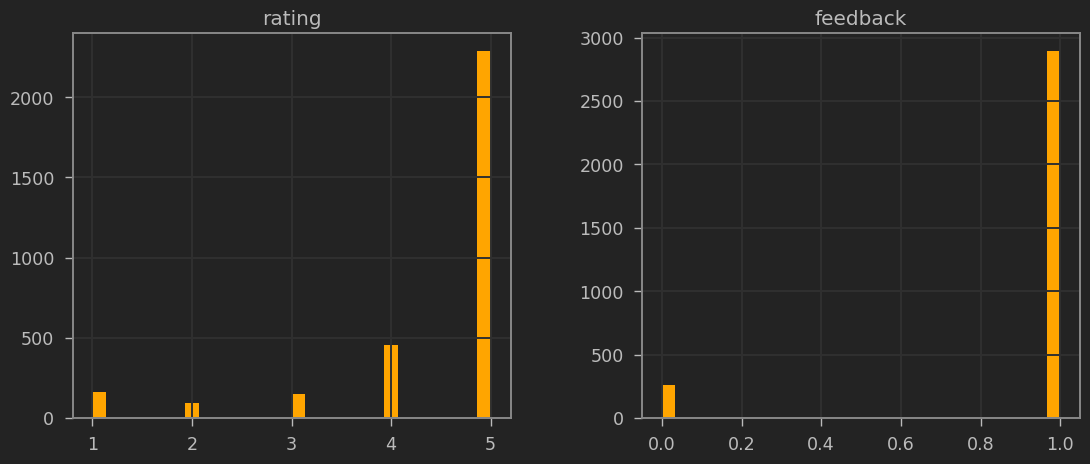

In [9]:
reviews_df.hist(bins = 30, figsize = (13,5), color = 'orange')

<Axes: xlabel='rating', ylabel='count'>

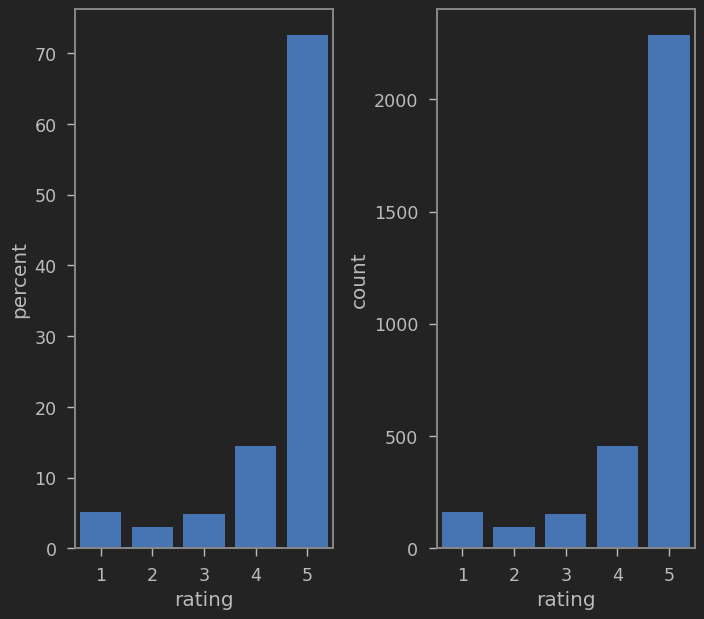

In [10]:
fig, axs = plt.subplots(ncols=2)

plt.subplots_adjust(wspace = 0.4)

sns.countplot(reviews_df, x='rating', stat = 'percent', ax=axs[0])
sns.countplot(reviews_df, x='rating', ax=axs[1])

In [11]:
positive = reviews_df[reviews_df['feedback']==1]

def add_trailing_space(s):
    if isinstance(s, str):
        return s + " "
    else:
        return s  # Return unchanged for non-string inputs

# Apply the function to the 'verified_reviews' column
positive['verified_reviews'] = positive['verified_reviews'].apply(add_trailing_space)

print(positive['verified_reviews'].to_string(index=False))

                                    Love my Echo! 
                                        Loved it! 
Sometimes while playing a game, you can answer ...
I have had a lot of fun with this thing. My 4 y...
                                            Music 
I received the echo as a gift. I needed another...
Without having a cellphone, I cannot use many o...
I think this is the 5th one I've purchased. I'm...
                                      looks great 
Love it! I’ve listened to songs I haven’t heard...
I sent it to my 85 year old Dad, and he talks t...
I love it! Learning knew things with it eveyday...
I purchased this for my mother who is having kn...
                               Love, Love, Love!! 
                         Just what I expected.... 
                        I love it, wife hates it. 
Really happy with this purchase.  Great speaker...
We have only been using Alexa for a couple of d...
We love the size of the 2nd generation echo. St...
I liked the original Echo. This

/tmp/ipykernel_19175/3512060624.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['verified_reviews'] = positive['verified_reviews'].apply(add_trailing_space)


In [12]:
negative = reviews_df[reviews_df['feedback']==0]

# Apply the function to the 'verified_reviews' column
negative['verified_reviews'] = negative['verified_reviews'].apply(add_trailing_space)

print(negative['verified_reviews'].to_string(index=False))

# negative

It's like Siri, in fact, Siri answers more accu...
Sound is terrible if u want good music too get ...
                               Not much features. 
Stopped working after 2 weeks ,didn't follow co...
                             Sad joke. Worthless. 
Really disappointed Alexa has to be plug-in to ...
It's got great sound and bass but it doesn't wo...
I am not super impressed with Alexa. When my Pr...
Too difficult to set up.  It keeps timing out b...
                           Alexa hardly came on.. 
Item no longer works after just 5 months of use...
This thing barely works. You have to select 3rd...
I returned 2 Echo Dots & am only getting refund...
                                      not working 
        I'm an Echo fan but this one did not work 
                                                  
Doesn't always respond when spoken to with prom...
It worked for a month or so then it stopped. I'...
                      Poor quality. Gave it away. 
Never could get it to work. A t

/tmp/ipykernel_19175/3778728449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['verified_reviews'] = negative['verified_reviews'].apply(add_trailing_space)


In [13]:
pos_wordcloud = positive['verified_reviews'].tolist()
len(pos_wordcloud)

2893

In [14]:
neg_wordcloud = negative['verified_reviews'].tolist()
len(neg_wordcloud)

257

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#Cleaning punctuation
pos_wordcloud_nopunc = [char for char in pos_wordcloud if char not in string.punctuation ]
pos_wordcloud_nopunc = ''.join(pos_wordcloud_nopunc)
pos_wordcloud_nopunc

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [19]:
#Cleaning stop words
pos_wordcloud_cleaned = [word for word in pos_wordcloud_nopunc.split() if word.lower() not in stopwords.words('english')]
pos_wordcloud_cleaned = ' '.join(pos_wordcloud_cleaned)
print(pos_wordcloud_cleaned)

Love Echo! Loved it! Sometimes playing game, answer question correctly Alexa says got wrong answers you. like able turn lights away home. lot fun thing. 4 yr old learns dinosaurs, control lights play games like categories. nice sound playing music well. Music received echo gift. needed another Bluetooth something play music easily accessible, found smart speaker. Can’t wait see else do. Without cellphone, cannot use many features. iPad see use. great alarm. u r almost deaf, hear alarm bedroom living room, reason enough keep her.It fun ask random questions hear response. seem smartbon politics yet. think 5th one I've purchased. I'm working getting one every room house. really like features offer specifily playing music Echos controlling lights throughout house. looks great Love it! I’ve listened songs haven’t heard since childhood! get news, weather, information! It’s great! sent 85 year old Dad, talks constantly. love it! Learning knew things eveyday! Still figuring everything works fa

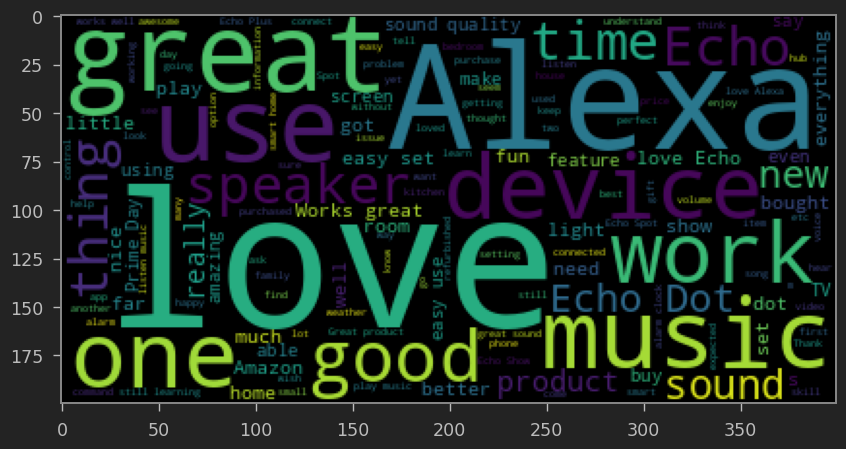

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(pos_wordcloud_cleaned))

In [21]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
#Cleaning punctuation
neg_wordcloud = [item for item in neg_wordcloud if isinstance(item, str)] #removing non-string entries
neg_wordcloud_nopunc = [''.join(char for char in word if char not in string.punctuation) for word in neg_wordcloud]
neg_wordcloud_nopunc = ''.join(neg_wordcloud_nopunc)

# type(neg_wordcloud_nopunc)
# print(neg_wordcloud_nopunc)

In [23]:
#Cleaning stop words
neg_wordcloud_cleaned = [word for word in neg_wordcloud_nopunc.split() if word.lower() not in stopwords.words('english')]
neg_wordcloud_cleaned = ' '.join(neg_wordcloud_cleaned)
print(neg_wordcloud_cleaned)

like Siri fact Siri answers accurately Alexa dont see real need household though good bargain prime day deals Sound terrible u want good music get bose much features Stopped working 2 weeks didnt follow commands Really fun working Sad joke Worthless Really disappointed Alexa plugin wall socket time fault checking made assumption company technologically advanced Amazon would sell product rechargeable battery could return would Apple music boom speaker give flexibility Alexa got great sound bass doesnt work time still hot miss recognizes things super impressed Alexa Prime lapsed wouldnt play anything isnt smart enough differentiate among spotify accounts cant use either randomly speaks nobody talking today unplugged hernot sure Ill ever use Alexa difficult set keeps timing enter password Alexa hardly came Item longer works 5 months use connect wifi unresponsive reset requests thing barely works select 3rd party apps stuff youd think could box Im sending mine back asap Waste money returne

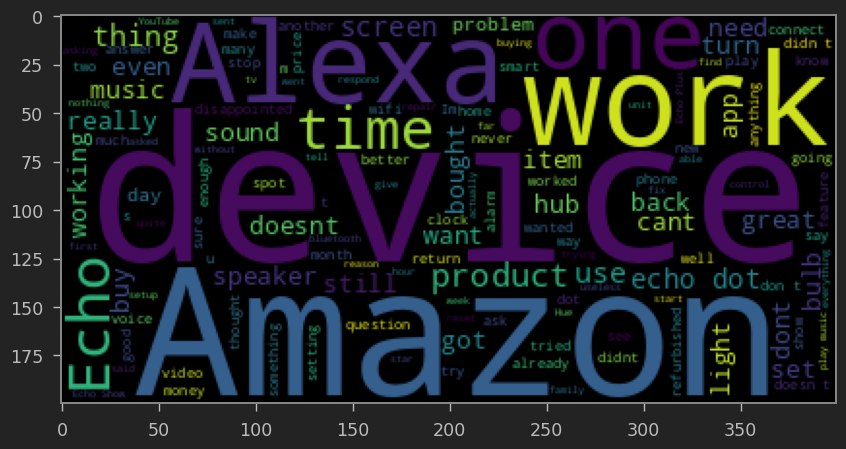

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neg_wordcloud_cleaned))

In [25]:
def message_cleaning(message):
    no_nonstr = [item for item in message if isinstance(item, str)]
    punc_removed = [char for char in no_nonstr if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [26]:
def remove_non_string_entries(df, column_name):
    """
    Removes non-string entries from a specified column in a Pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - column_name: Name of the column to process

    Returns:
    - Modified DataFrame with non-string entries removed from the specified column
    """
    df[column_name] = df[column_name].apply(lambda x: str(x) if isinstance(x, str) else None)
    df = df.dropna(subset=[column_name])
    return df


In [27]:
reviews_df = remove_non_string_entries(reviews_df, 'verified_reviews')
# print(reviews_df['verified_reviews'])

In [28]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [29]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [30]:
print(vectorizer.get_feature_names_out())


['072318' '1' '10' ... '😬' '😳' '🤓']


In [31]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
reviews_countvectorizer.shape

(3149, 5211)

In [33]:
X = pd.DataFrame(reviews_countvectorizer.toarray())

In [34]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = reviews_df['feedback']

In [36]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3149, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

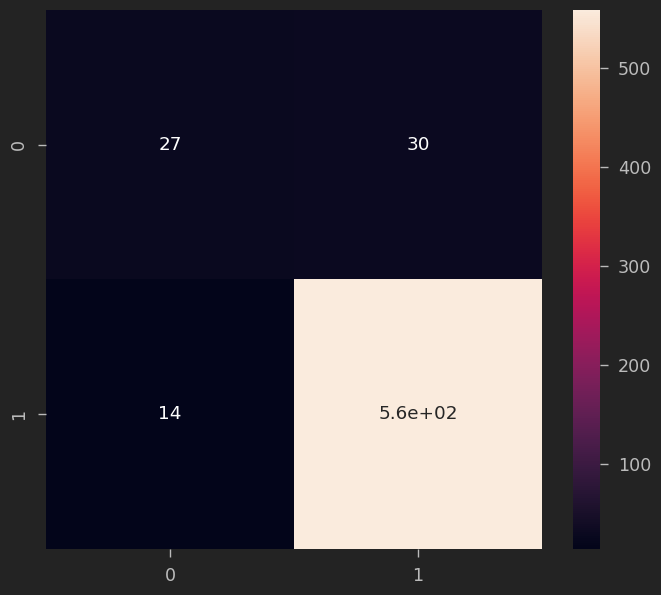

In [39]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55        57
           1       0.95      0.98      0.96       573

    accuracy                           0.93       630
   macro avg       0.80      0.72      0.76       630
weighted avg       0.92      0.93      0.92       630



              precision    recall  f1-score   support

           0       0.84      0.37      0.51        57
           1       0.94      0.99      0.97       573

    accuracy                           0.94       630
   macro avg       0.89      0.68      0.74       630
weighted avg       0.93      0.94      0.92       630



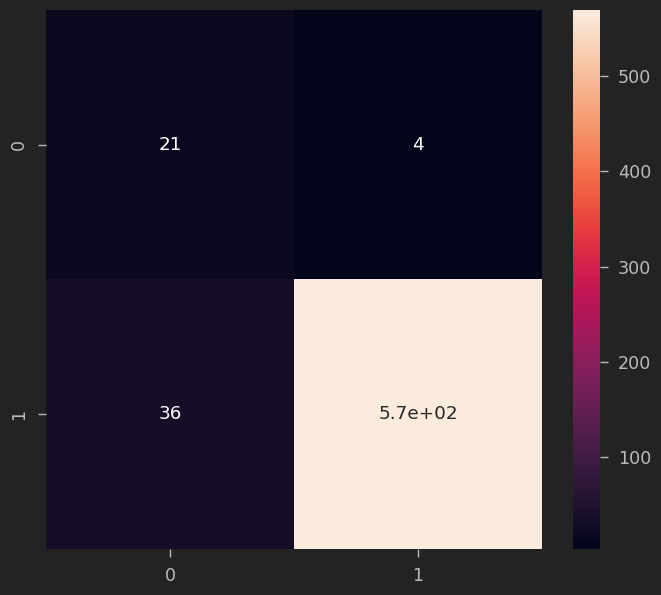

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.19      0.30        57
           1       0.93      0.99      0.96       573

    accuracy                           0.92       630
   macro avg       0.81      0.59      0.63       630
weighted avg       0.90      0.92      0.90       630



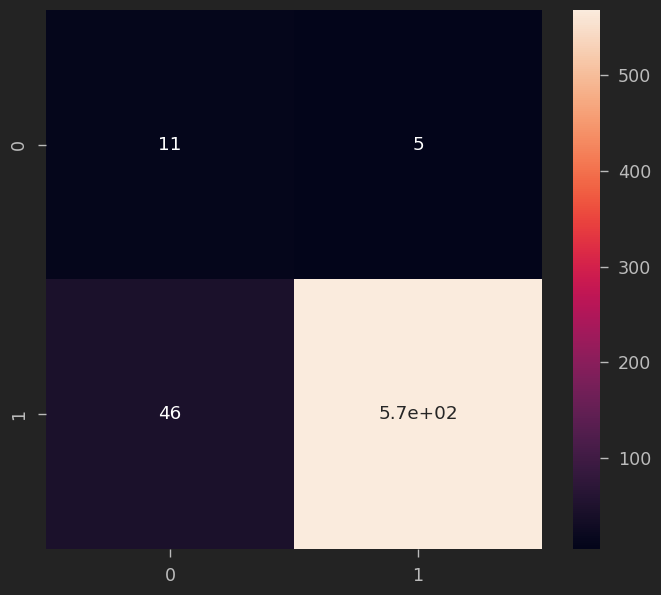

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))